<a href="https://colab.research.google.com/github/MansiSinghP/Tasks-The-sparks-Foundation/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.shape

(25, 2)

In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##Analyzing Data


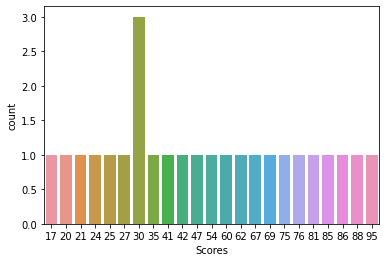

In [ ]:
sns.countplot(x='Scores',data=dataset)

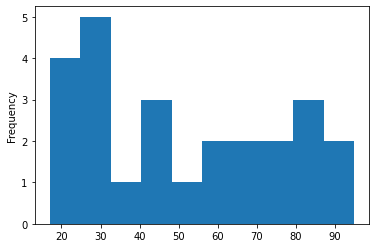

In [ ]:
dataset['Scores'].plot.hist()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


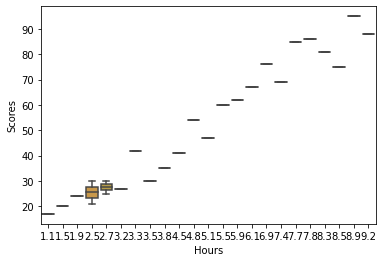

In [ ]:
sns.boxplot(x='Hours',y='Scores',data=dataset)

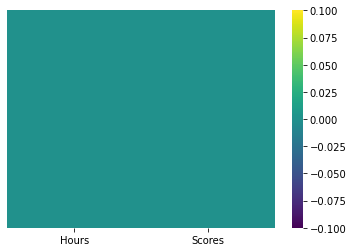

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cmap="viridis")

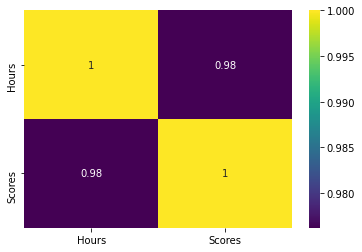

In [ ]:
# correlation plot
corr = dataset.corr()
sns.heatmap(corr, cmap ='viridis', annot= True);

##Training Data

In [ ]:
#collect xand y
X=dataset['Hours'].values
Y=dataset['Scores'].values

import matplotlib.pyplot as plt
#mean of x and y
mean_x=np.mean(X)
mean_y=np.mean(Y)
#tot no of values
m=len(X)
#using the formula to calc b1 & b0 or (m=slope) & c
numer=0
denom=0
for i in range(m):
        numer += (X[i]-mean_x) * (Y[i]-mean_y)
        denom += (X[i]-mean_x) ** 2
b1=numer/denom
b0=mean_y - (b1 * mean_x)
#print coeff
print(b1,b0)

9.775803390787475 2.4836734053731746


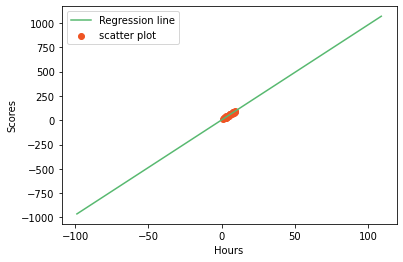

In [ ]:
#plotting values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100
#calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y = b0 + b1 * x
#ploting line
plt.plot(x,y,color='#58b970',label='Regression line')
#plotting scatter points
plt.scatter(X,Y,c='#ef5423',label='scatter plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [ ]:
ss_t=0
ss_r=0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1-(ss_r/ss_t)
print(r2)

0.9529481969048356


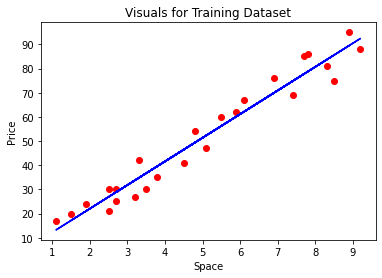

In [ ]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
X=X.reshape(-1,1)
regressor.fit(X,Y)


#Predicting the prices
pred = regressor.predict(X)
#Visualizing the training Test Results 
plt.scatter(X,Y, color= 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()


In [ ]:
regressor.predict([[9.25]])

array([92.90985477])